<a href="https://colab.research.google.com/github/SouhardyaSaha/ML-Course-SWE-428/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Access

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# This 2 lines should be run 1st time of running the program
# %cd '/content/drive/MyDrive/ML Assignement'
# !unzip CNN_dataset.zip

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D

In [53]:
dir_path = '/content/drive/MyDrive/ML Assignement/CNN_dataset'

train_split = 0.8
val_split = 0.1
test_split = 1 - train_split - val_split

images = []
labels = []

categories = [ 'CXR', 'ChestCT', 'AbdomenCT', 'Hand', 'HeadCT']

In [54]:
for i, category in enumerate(categories):
  category_path = os.path.join(dir_path, category)
  
  for img_title in os.listdir(category_path):
      img_dir = os.path.join(category_path, img_title)
      img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (64, 64))
      images.append(img)
      labels.append(i)

In [55]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    images, 
    labels, 
    test_size=test_split, 
    stratify=labels, 
    random_state=24
  )

x_train, x_val, y_train, y_val = train_test_split(
    x_train, 
    y_train, 
    test_size=val_split/(train_split-val_split),
    stratify=y_train, 
    random_state=24
  )

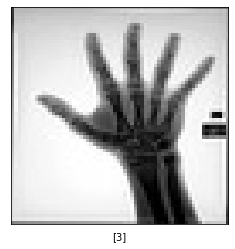

In [57]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[50]])
plt.imshow(x_train[50],cmap=plt.cm.binary)

In [58]:
x_train /= 255.
x_val /= 255.
x_test /= 255.

In [59]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=(2,2), strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 32)       

In [60]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
x_train = x_train.reshape(-1, 64, 64, 1) #Reshape for CNN 
x_test = x_test.reshape(-1, 64, 64, 1)
x_train.shape

(38571, 64, 64, 1)

In [62]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
450/450 [==============================] - 9s 16ms/step - loss: 0.1770 - accuracy: 0.9461 - val_loss: 0.0285 - val_accuracy: 0.9913
Epoch 2/10
450/450 [==============================] - 8s 17ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.0152 - val_accuracy: 0.9958
Epoch 3/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0248 - val_accuracy: 0.9946
Epoch 4/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0169 - val_accuracy: 0.9947
Epoch 5/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0126 - val_accuracy: 0.9963
Epoch 6/10
450/450 [==============================] - 7s 15ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0096 - val_accuracy: 0.9970
Epoch 7/10
450/450 [==============================] - 7s 15ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0045 - val_accuracy: 0.9984

In [63]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9797999858856201


In [64]:
predictions = model.predict(x_test)
predictions[0]

157/157 [==============================] - 0s 2ms/step


array([3.5788096e-06, 9.3738985e-01, 6.2453974e-02, 1.5261449e-04,
       5.5215953e-08], dtype=float32)

In [65]:
predictions[0]

array([3.5788096e-06, 9.3738985e-01, 6.2453974e-02, 1.5261449e-04,
       5.5215953e-08], dtype=float32)

In [66]:
np.argmax(predictions[0])

1

In [67]:
x_test = x_test.reshape(-1, 64, 64)
x_test.shape

(5000, 64, 64)

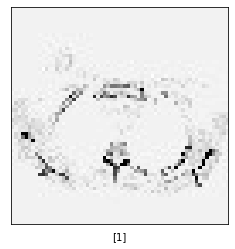

In [68]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_test[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)

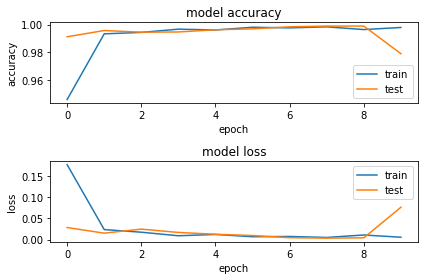

In [69]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()